### Importing libraries

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Reading the data in csv format

In [9]:
df = pd.read_csv('HireArt - Data Analyst Exercise 10.12.17 - Sheet1.csv')

In [37]:
#what's in the data ? Printing first five rows of the csv
df.head()

,Account manager,Client Name,Date of Contact,Year,Month,Day
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31,2015,10,31
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15,2013,12,15
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07,2013,12,07
3,Milan Crona,Armstrong Group,2013-11-02,2013,11,02
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25,2013,12,25


In [38]:
#Understanding the data - columns and datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
Account manager    1001 non-null object
Client Name        1001 non-null object
Date of Contact    1001 non-null object
Year               1001 non-null object
Month              1001 non-null object
Day                1001 non-null object
dtypes: object(6)
memory usage: 47.0+ KB


In [39]:
#Are there any null values in the data ?
df.isnull().values.any()

False

In [40]:
#Finding the descriptive statistics of the dataframe
df.describe()

,Account manager,Client Name,Date of Contact,Year,Month,Day
count,1001,1001,1001,1001,1001,1001
unique,4,35,704,5,12,31
top,Milan Crona,Eichmann and Sons,2013-10-11,2014,10,19
freq,286,38,7,264,213,44


### Splitting the 'Date of Contact' to year, month and day to see which month had the most number of contacts

In [41]:
df['Year'], df['Month'], df['Day'] = zip(*df['Date of Contact'].map(lambda x: x.split('-')))
df.head()

,Account manager,Client Name,Date of Contact,Year,Month,Day
0,Milan Crona,"Wyman, Farrell and Haag",2015-10-31,2015,10,31
1,Aidan Pouros,"Veum, McClure and Schuster",2013-12-15,2013,12,15
2,Aidan Pouros,"Veum, McClure and Schuster",2013-12-07,2013,12,07
3,Milan Crona,Armstrong Group,2013-11-02,2013,11,02
4,Aidan Pouros,"Lueilwitz, Moore and Hahn",2013-12-25,2013,12,25


In [42]:
df.describe()

,Account manager,Client Name,Date of Contact,Year,Month,Day
count,1001,1001,1001,1001,1001,1001
unique,4,35,704,5,12,31
top,Milan Crona,Eichmann and Sons,2013-10-11,2014,10,19
freq,286,38,7,264,213,44


Now find out the month they are likely to contact most clients, so they can schedule a product upgrade announcement. 


In [44]:
#Let us first find out number of clients contacted per Month, soreted by maximum number of clients
df_month= df.groupby(['Month'])['Client Name'].count().reset_index(name='Number of Clients').sort_values(['Number of Clients'], ascending=False)
df_month

,Month,Number of Clients
9,10,213
8,09,121
7,08,79
5,06,77
11,12,77
4,05,69
6,07,66
10,11,65
1,02,64
0,01,60


Looks like October is the month where most clients are contacted ! Let us visualize the results to confirm this.

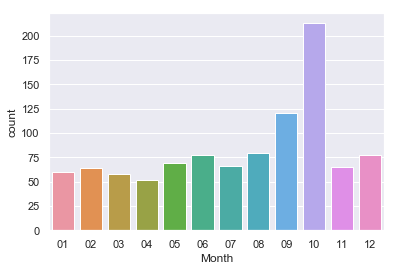

In [55]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Month", data=df)

In [57]:
#Let us see the year and month in which maximum number of clients are contacted
df_month_year = df.groupby(['Month','Year'])['Client Name'].count().reset_index(name='Number of Clients').sort_values(['Number of Clients'], ascending=False)
df_month_year

,Month,Year,Number of Clients
36,10,2013,60
37,10,2014,58
38,10,2015,53
39,10,2016,42
32,09,2014,33
35,09,2017,31
33,09,2015,29
34,09,2016,28
28,08,2014,25
20,06,2014,23


October 2013 has maximum number of clients contacted and count is 60. But number of unique clients is 35, from previous analysis.

In [59]:
#Finding the maximum unique clients contacted in each month 
df_month_year_client=df.groupby(['Month','Year','Client Name'])['Client Name'].count().reset_index(name='Number of Clients').sort_values(['Number of Clients'], ascending=False)
df_month_year_client

,Month,Year,Client Name,Number of Clients
588,10,2015,"Wyman, Farrell and Haag",7
507,10,2013,Donnelly-Champlin,6
540,10,2014,Eichmann and Sons,5
538,10,2014,"Denesik, Stehr and Carter",5
519,10,2013,"Kuhic, Stark and Kreiger",4
561,10,2015,Abbott Group,4
525,10,2013,Ondricka-Wolff,4
504,10,2013,"Brown, Wyman and Grimes",4
463,09,2016,"Anderson, Kutch and Hyatt",4
600,10,2016,"Hermiston, Armstrong and Balistreri",4


One client has been contacted multiple times for that perticular month and year.

In [60]:
df_unique_client_month= df.groupby('Month')[('Client Name')].nunique().reset_index(name='Unique Client Count').sort_values(['Unique Client Count'], ascending=False)
df_unique_client_month

,Month,Unique Client Count
9,10,35
5,06,34
4,05,33
7,08,33
8,09,33
11,12,32
1,02,31
0,01,30
10,11,30
2,03,29


From this, we can confirm that October has maximum number of clients contacted.

In [72]:
#Percentage of clients contacted
def perc_contact_clients():
    no_unique_clients_total = df['Client Name'].nunique()
    df_month = df.groupby('Month')
    no_of_clients = df_month['Client Name'].nunique()
    perc = (no_of_clients/no_unique_clients_total) * 100
    my_dict = {}
    j =0
    for i in df_month:
        my_dict[i[0]]=perc[j]
        j = j+1
    maximum = max(my_dict, key=my_dict.get)  
    print("The month most clients were contacted: ",maximum,'\n')
    print('\n', perc)

In [73]:
perc_contact_clients()

The month most clients were contacted:  10 


 Month
01     85.714286
02     88.571429
03     82.857143
04     74.285714
05     94.285714
06     97.142857
07     80.000000
08     94.285714
09     94.285714
10    100.000000
11     85.714286
12     91.428571
Name: Client Name, dtype: float64


### Visualizing the results

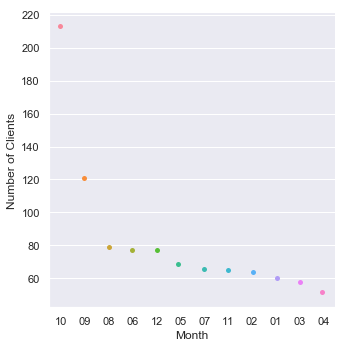

In [84]:
sns.catplot(x="Month", y="Number of Clients", data=df_month, order=df_month['Month'])


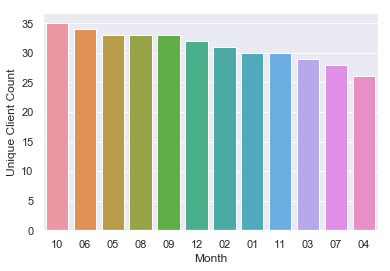

In [83]:
sns.barplot(x="Month", y="Unique Client Count", data=df_unique_client_month, order=df_unique_client_month['Month'])

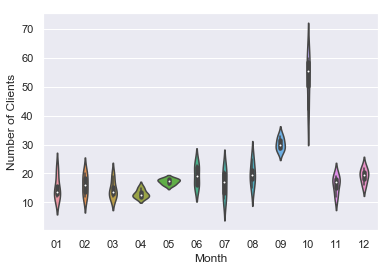

In [88]:
sns.violinplot(x="Month", y="Number of Clients", data=df_month_year)

In [98]:
def perc_contact_clients_month_year():
    
    years = list(df.Year.unique())
    for y in years:
        df_year = df[df['Year'] == y]
        grouped = df_year.groupby(['Month'])
        no_of_clients = grouped['Client Name'].nunique()
        no_unique_clients_total = df_year['Client Name'].nunique()
        perc = (no_of_clients/no_unique_clients_total) * 100
        my_dict = {}
        j =0
        for i in grouped:
            my_dict[i[0]]=perc[j]
            j = j+1
        maximum = max(my_dict, key=my_dict.get)  
        print("In the year",y,"month in which max no of unique clients conatcted is:",maximum,"with",round(my_dict[maximum],4),"percentage ")
        plt.bar(range(len(my_dict)), list(my_dict.values()), align='center',color = 'blue')
        plt.xticks(range(len(my_dict)), list(my_dict.keys()))
        plt.show()

In the year 2015 month in which max no of unique clients conatcted is: 10 with 80.0 percentage 


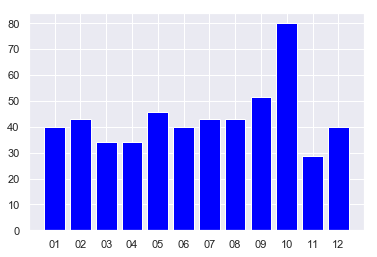

In the year 2013 month in which max no of unique clients conatcted is: 10 with 88.5714 percentage 


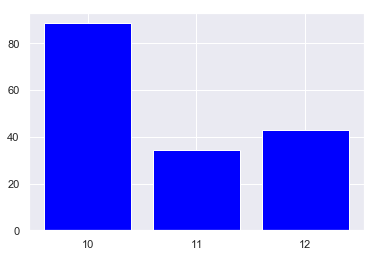

In the year 2016 month in which max no of unique clients conatcted is: 10 with 71.4286 percentage 


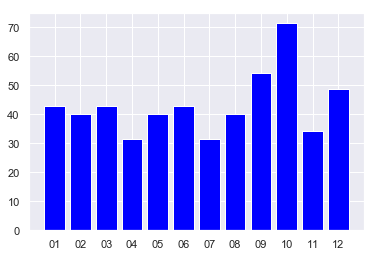

In the year 2014 month in which max no of unique clients conatcted is: 10 with 80.0 percentage 


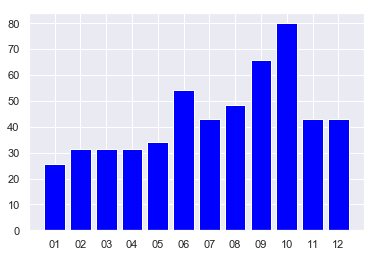

In the year 2017 month in which max no of unique clients conatcted is: 09 with 60.0 percentage 


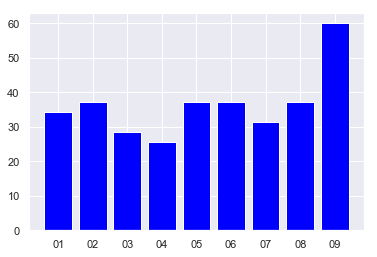

In [99]:
perc_contact_clients_month_year()

#### Now we can conclue that October is the month where all 35 unique clients are contacted.